In [2490]:
pip install --upgrade scikit-learn


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2491]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, quantile_transform
from sklearn.impute import SimpleImputer

from sklearn.metrics import mean_absolute_error, r2_score
import statsmodels.api as sm

In [2492]:
df = pd.read_csv('/Users/mikeredshaw/Documents/Schulich MBAN/MBAN 6110 - Data Science/Assignment 3/kc_house_data.csv')

In [2493]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [2494]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [2495]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [2496]:
df['date'] = pd.to_datetime(df['date'])

In [2497]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [2498]:
df.insert(2, 'sale_month', df['date'].dt.month)
df.insert(3, 'sale_year', df['date'].dt.year)
df.insert(4, 'sale_day', df['date'].dt.day)

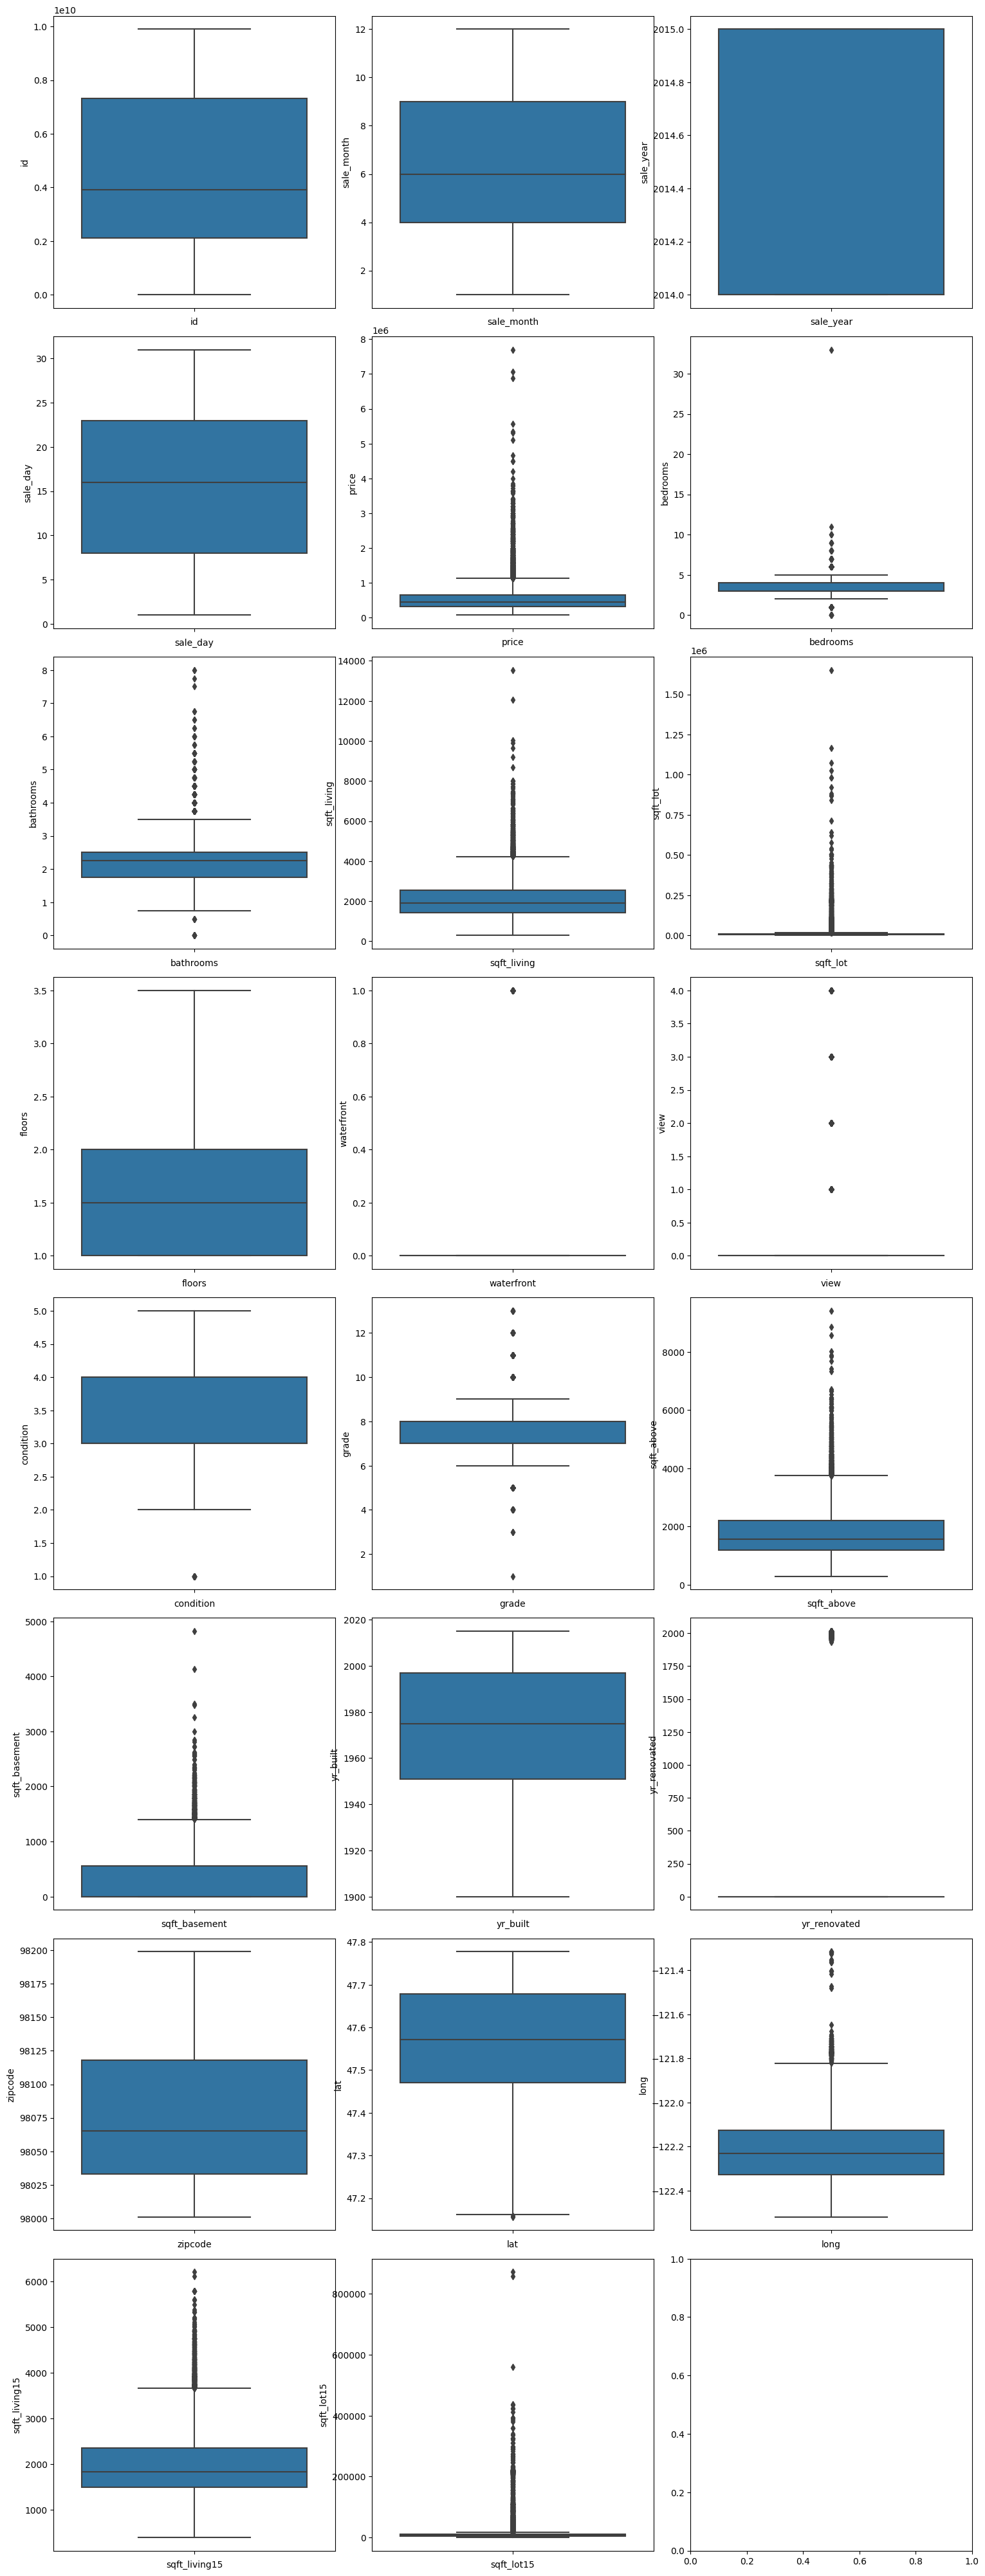

In [2499]:
columns = df.columns.drop(['date'])

# Set the number of rows and columns for the subplots grid
num_rows = (len(columns) - 1) // 3 + 1
num_cols = 3

# Create the subplots grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout()

# Iterate over the columns and create scatter plots with a line of best fit
for i, column in enumerate(columns):
    ax = axes[i // num_cols, i % num_cols]  # Select the appropriate subplot
    sns.boxplot(data=df, y=column, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel(column)

plt.show()

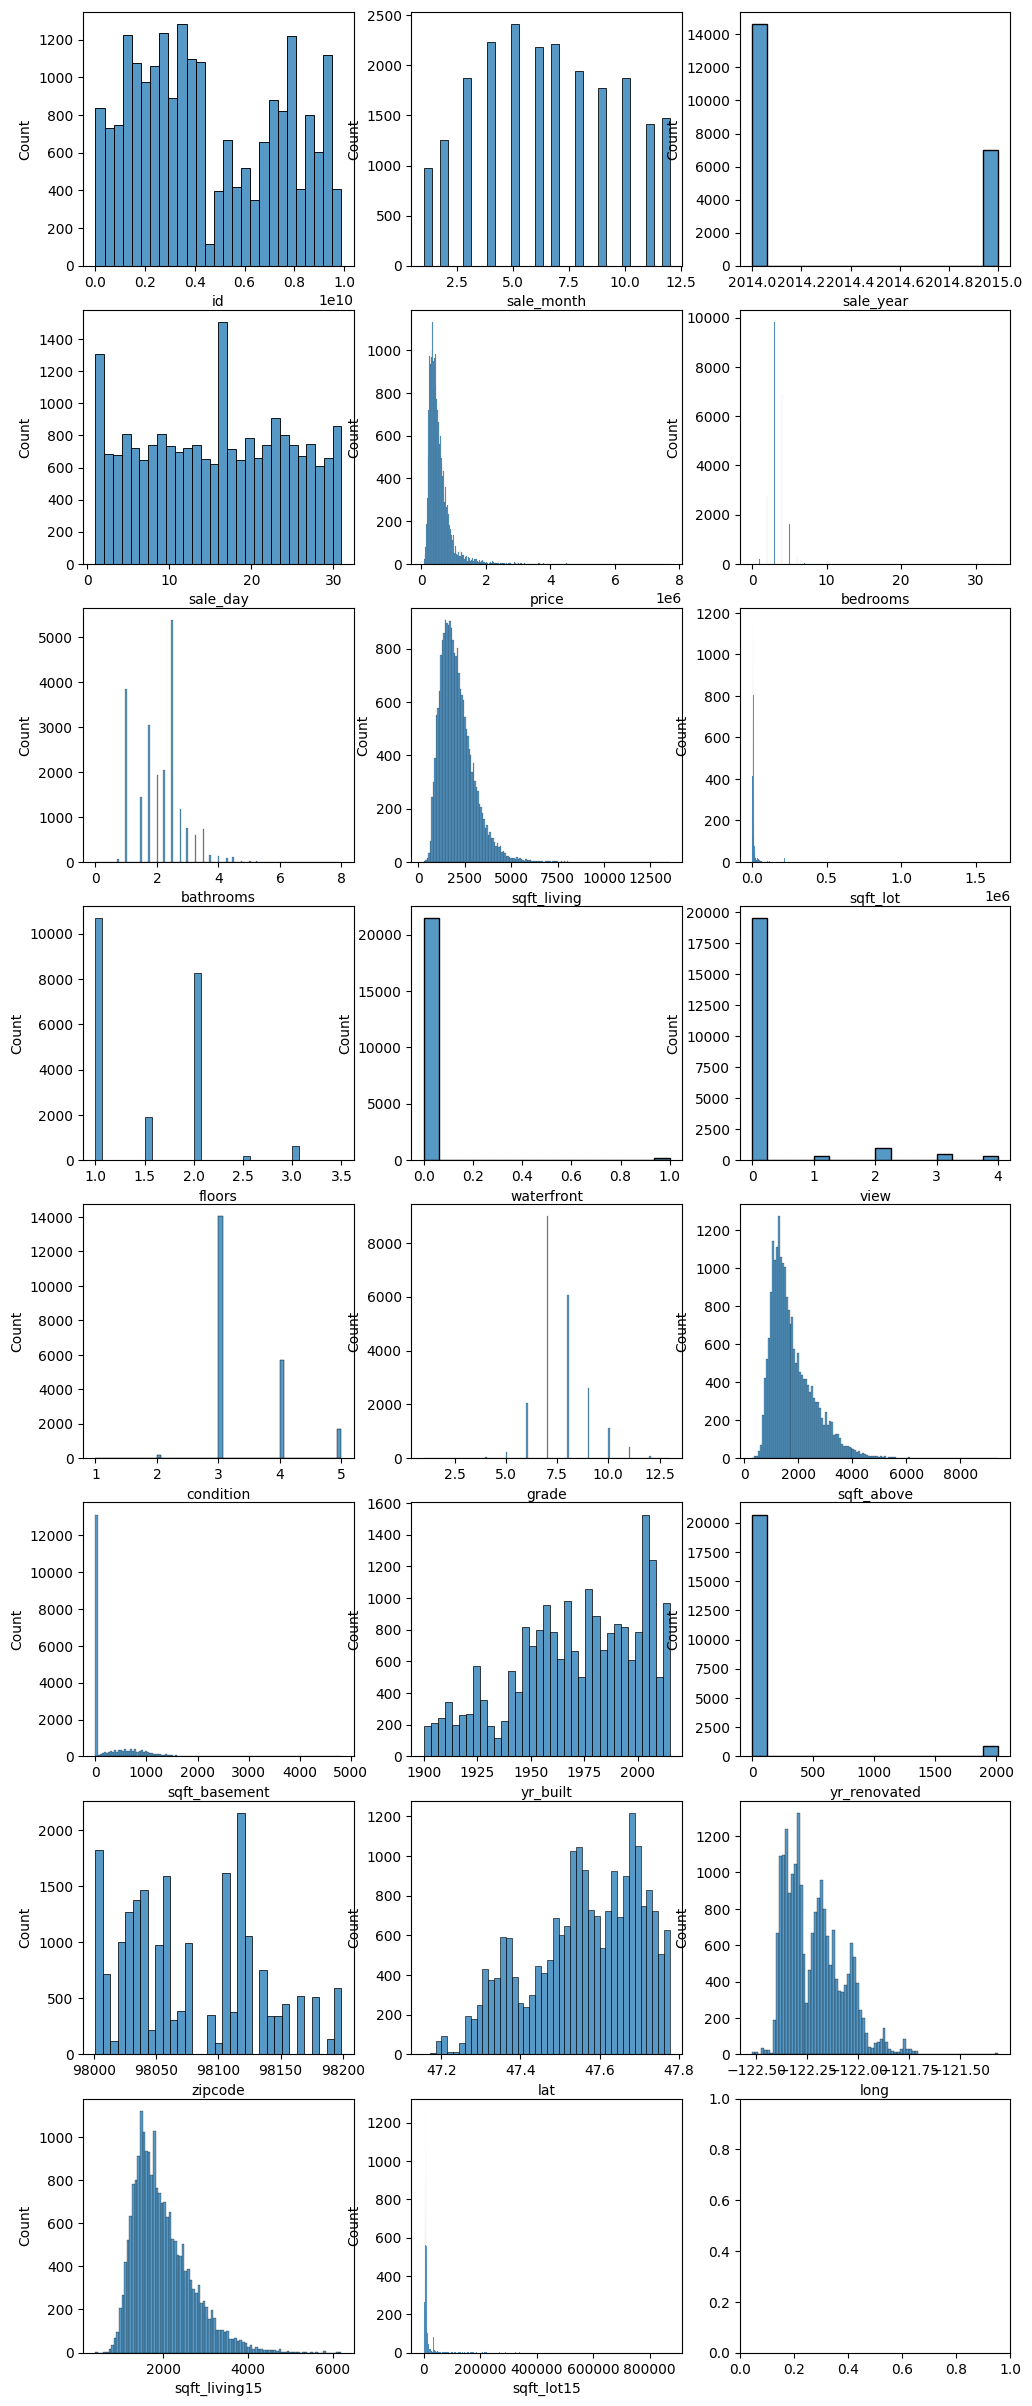

In [2500]:
# Set the number of rows and columns for the subplots grid
num_plots = len(columns)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

# Set the size of the figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows))
fig.tight_layout()

# Iterate over the columns and create the density plots
for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.histplot(data=df, x=column, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

plt.show()


In [2501]:
df.drop_duplicates()

,id,date,sale_month,sale_year,sale_day,price,bedrooms,bathrooms,sqft_living,sqft_lot,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,10,2014,13,221900.0,3,1.00,1180,5650,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,12,2014,9,538000.0,3,2.25,2570,7242,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,2,2015,25,180000.0,2,1.00,770,10000,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,12,2014,9,604000.0,4,3.00,1960,5000,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,2,2015,18,510000.0,3,2.00,1680,8080,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,5,2014,21,360000.0,3,2.50,1530,1131,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,2,2015,23,400000.0,4,2.50,2310,5813,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,6,2014,23,402101.0,2,0.75,1020,1350,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,1,2015,16,400000.0,3,2.50,1600,2388,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [2502]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   sale_month     21613 non-null  int32         
 3   sale_year      21613 non-null  int32         
 4   sale_day       21613 non-null  int32         
 5   price          21613 non-null  float64       
 6   bedrooms       21613 non-null  int64         
 7   bathrooms      21613 non-null  float64       
 8   sqft_living    21613 non-null  int64         
 9   sqft_lot       21613 non-null  int64         
 10  floors         21613 non-null  float64       
 11  waterfront     21613 non-null  int64         
 12  view           21613 non-null  int64         
 13  condition      21613 non-null  int64         
 14  grade          21613 non-null  int64         
 15  sqft_above     2161

The entry with 33 bedrooms seems to be a major outlier. Additionally, entries that have 0 bathrooms don't make much sense for houses. I'm going to review these entries to decide if they should be removed.

In [2503]:
print(df[df['bedrooms'] > 30])

               id       date  sale_month  sale_year  sale_day     price   
15870  2402100895 2014-06-25           6       2014        25  640000.0  \

       bedrooms  bathrooms  sqft_living  sqft_lot  ...  grade  sqft_above   
15870        33       1.75         1620      6000  ...      7        1040  \

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long   
15870            580      1947             0    98103  47.6878 -122.331  \

       sqft_living15  sqft_lot15  
15870           1330        4700  

[1 rows x 24 columns]


In [2504]:
print(df[df['bathrooms'] == 0])

               id       date  sale_month  sale_year  sale_day      price   
875    6306400140 2014-06-12           6       2014        12  1095000.0  \
1149   3421079032 2015-02-17           2       2015        17    75000.0   
3119   3918400017 2015-02-05           2       2015         5   380000.0   
5832   5702500050 2014-11-04          11       2014         4   280000.0   
6994   2954400190 2014-06-24           6       2014        24  1295650.0   
9773   3374500520 2015-04-29           4       2015        29   355000.0   
9854   7849202190 2014-12-23          12       2014        23   235000.0   
10481   203100435 2014-09-18           9       2014        18   484000.0   
14423  9543000205 2015-04-13           4       2015        13   139950.0   
19452  3980300371 2014-09-26           9       2014        26   142000.0   

       bedrooms  bathrooms  sqft_living  sqft_lot  ...  grade  sqft_above   
875           0        0.0         3064      4764  ...      7        3064  \
1149     

Since homes with 33 homes, or no bathroom at all are not normal, I will look to drop these few values to improve the distribution of these variables

In [2505]:
df= df[df['bathrooms'] != 0]
df=df[df['bedrooms'] != 33]

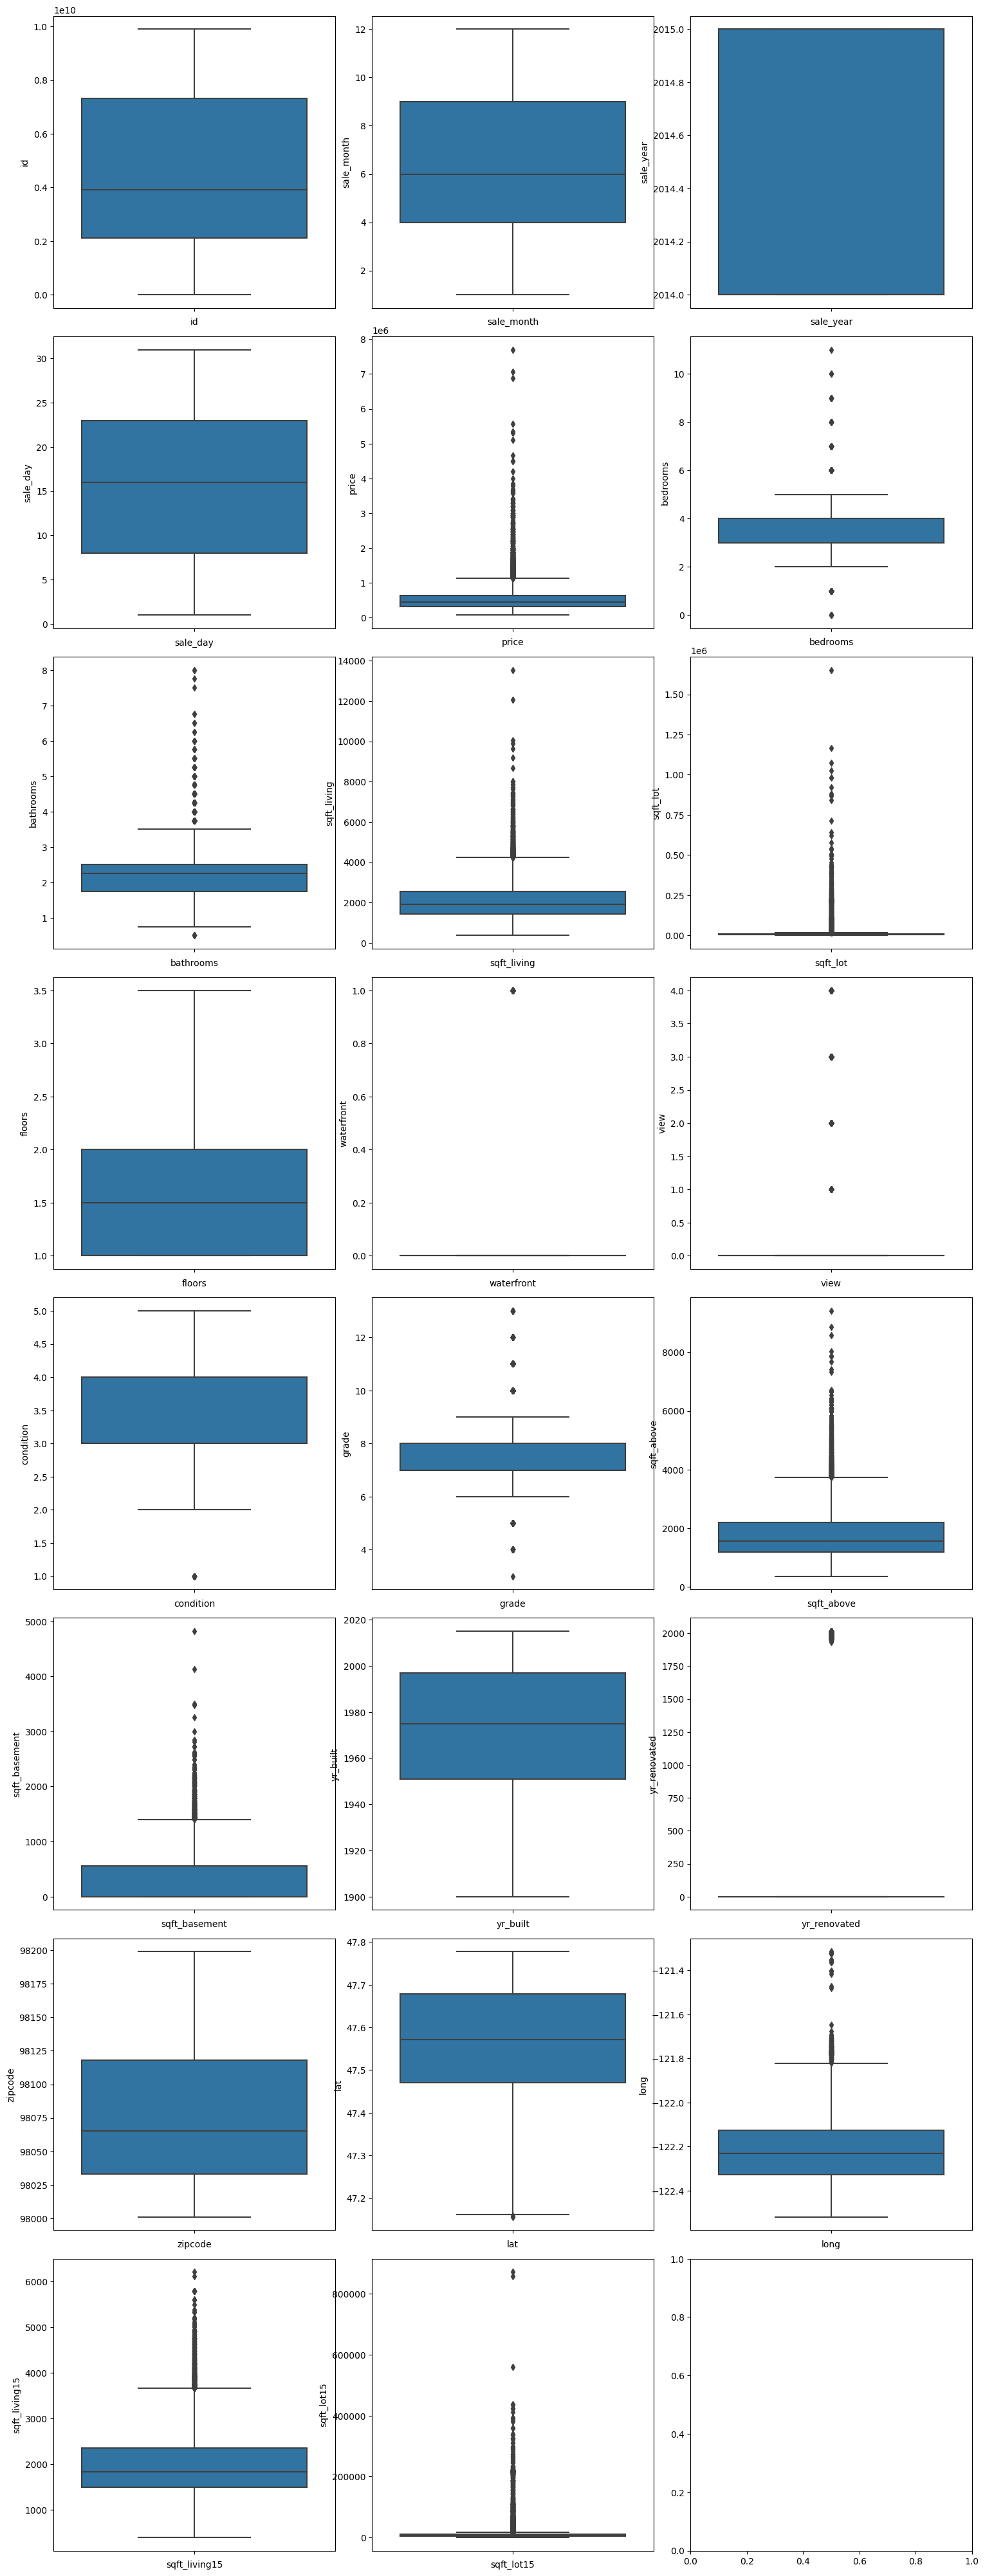

In [2506]:
# Set the number of rows and columns for the subplots grid
num_rows = (len(columns) - 1) // 3 + 1
num_cols = 3

# Create the subplots grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout()

# Iterate over the columns and create scatter plots with a line of best fit
for i, column in enumerate(columns):
    ax = axes[i // num_cols, i % num_cols]  # Select the appropriate subplot
    sns.boxplot(data=df, y=column, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel(column)

plt.show()

I want to review the relationship each variable has with the price. To do this, I will review the correlation coeffecient between all variables and price. To speed this up, I will use a for loop to loop through all column names in the dataframe, then sort them highest to lowest..

In [2507]:
correlations = [(column, df[column].corr(df['price'])) for column in columns]
correlations_sorted = sorted(correlations, key=lambda x: abs(x[1]), reverse=True)

for column, corr_coeff in correlations_sorted:
    print(f"Correlation between {column} and price: {corr_coeff:.2f}")


Correlation between price and price: 1.00
Correlation between sqft_living and price: 0.70
Correlation between grade and price: 0.67
Correlation between sqft_above and price: 0.61
Correlation between sqft_living15 and price: 0.59
Correlation between bathrooms and price: 0.53
Correlation between view and price: 0.40
Correlation between sqft_basement and price: 0.32
Correlation between bedrooms and price: 0.32
Correlation between lat and price: 0.31
Correlation between waterfront and price: 0.27
Correlation between floors and price: 0.26
Correlation between yr_renovated and price: 0.13
Correlation between sqft_lot and price: 0.09
Correlation between sqft_lot15 and price: 0.08
Correlation between yr_built and price: 0.05
Correlation between zipcode and price: -0.05
Correlation between condition and price: 0.04
Correlation between long and price: 0.02
Correlation between id and price: -0.02
Correlation between sale_day and price: -0.01
Correlation between sale_month and price: -0.01
Correla

In [2508]:
df_corr = df.copy()
df_corr.drop(columns=['id', 'date', 'sale_month', 'sale_year', 'sale_day'], inplace=True)

Reviewing the correlations, I've had a few ideas for additional variables to add to the dataframe to help with the models. These include sqft_living * grade, price per squarefoot to then calculate those values per locations.

In [2509]:
df['grade_value'] = df['grade'] * df['sqft_living']

In [2510]:
df['price_per_sqft'] = df['price']/df['sqft_living']

In [2511]:
df['renovated'] = np.where(df['yr_renovated'] == 0, 0, 1)

In [2512]:
df['sqft_per_floor'] = df['sqft_living']/df['floors']

In [2513]:
zip_price_per_sqft = df.groupby('zipcode')['price'].mean() / df.groupby('zipcode')['sqft_living'].mean()
df = df.merge(zip_price_per_sqft.rename('zip_price_per_sqft'), left_on='zipcode', right_index=True)

In [2514]:
df.head()

,id,date,sale_month,sale_year,sale_day,price,bedrooms,bathrooms,sqft_living,sqft_lot,...,zipcode,lat,long,sqft_living15,sqft_lot15,grade_value,price_per_sqft,renovated,sqft_per_floor,zip_price_per_sqft
0,7129300520,2014-10-13,10,2014,13,221900.0,3,1.00,1180,5650,...,98178,47.5112,-122.257,1340,5650,8260,188.050847,0,1180.0,179.612311
117,4060000240,2014-06-23,6,2014,23,205425.0,2,1.00,880,6780,...,98178,47.5009,-122.248,1190,6780,5280,233.437500,0,880.0,179.612311
126,4058801670,2014-07-17,7,2014,17,445000.0,3,2.25,2100,8201,...,98178,47.5091,-122.244,2660,8712,16800,211.904762,0,2100.0,179.612311
273,2976800796,2014-09-25,9,2014,25,236000.0,3,1.00,1300,5898,...,98178,47.5053,-122.255,1320,7619,9100,181.538462,0,1300.0,179.612311
281,6874200960,2015-02-27,2,2015,27,170000.0,2,1.00,860,5265,...,98178,47.5048,-122.272,1650,8775,5160,197.674419,0,860.0,179.612311


In [2515]:
columns = df.columns.drop(['id', 'date'])

In [2516]:
correlations = [(column, df[column].corr(df['price'])) for column in columns]
correlations_sorted = sorted(correlations, key=lambda x: abs(x[1]), reverse=True)

for column, corr_coeff in correlations_sorted:
    print(f"Correlation between {column} and price: {corr_coeff:.2f}")

Correlation between price and price: 1.00
Correlation between grade_value and price: 0.76
Correlation between sqft_living and price: 0.70
Correlation between grade and price: 0.67
Correlation between sqft_above and price: 0.61
Correlation between sqft_living15 and price: 0.59
Correlation between price_per_sqft and price: 0.56
Correlation between zip_price_per_sqft and price: 0.55
Correlation between bathrooms and price: 0.53
Correlation between sqft_per_floor and price: 0.43
Correlation between view and price: 0.40
Correlation between sqft_basement and price: 0.32
Correlation between bedrooms and price: 0.32
Correlation between lat and price: 0.31
Correlation between waterfront and price: 0.27
Correlation between floors and price: 0.26
Correlation between yr_renovated and price: 0.13
Correlation between renovated and price: 0.13
Correlation between sqft_lot and price: 0.09
Correlation between sqft_lot15 and price: 0.08
Correlation between yr_built and price: 0.05
Correlation between zi

We can see a few of the added columns actually have a strong correlation to the price of the house. We can't use things like price_per_sqft for a model (as we wouldn't have that info for future predictions), however things like zip_price_per_sqft, sqft_per_floor, and grade_value could be great additions. Lets check to see how these would work in a model.

In [2517]:
results = ols("price ~ grade_value + sqft_living + grade + sqft_above + sqft_living15 + zip_price_per_sqft + bathrooms + sqft_per_floor + view + sqft_basement + bedrooms + lat", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     8233.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        04:42:23   Log-Likelihood:            -2.8965e+05
No. Observations:               21602   AIC:                         5.793e+05
Df Residuals:                   21590   BIC:                         5.794e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.549e+06   4.82

In [2518]:
def quantile_loss(y_test, elasticnet_pred, q):
    residual = y_test - elasticnet_pred
    loss = np.where(residual >= 0, q * residual, (q - 1) * residual)
    return np.mean(loss)

In [2519]:
categorical_features = ['grade', 'view']
numerical_features = ['grade_value', 'sqft_living', 'sqft_above', 'sqft_living15', 'zip_price_per_sqft', 'bathrooms', 'sqft_per_floor', 'sqft_basement', 'bedrooms', 'lat']
target = 'price'

In [2520]:
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features],df[target], test_size = 0.3, random_state=1234)

In [2521]:
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps=[('scaler', StandardScaler()), ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean'))])

In [2522]:
preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_transformer, categorical_features),
    ('num', num_transformer, numerical_features)])

In [2523]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

linear_regression.fit(X_train, y_train)

linear_pred = linear_regression.predict(X_test)
print(linear_pred)

np.sqrt(mean_squared_error(linear_pred,y_test))

[512528. 434064. 760928. ... 257008. 446176. 535376.]


154832.40624763787

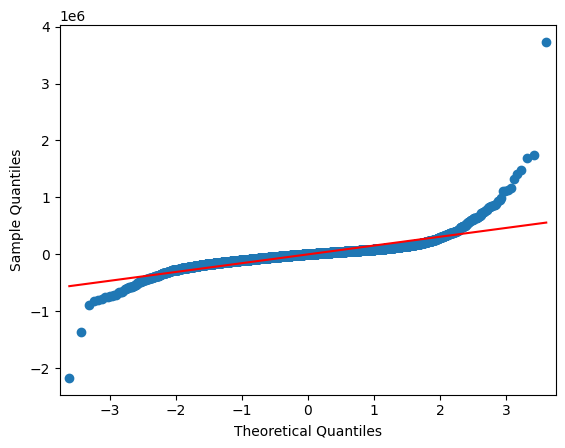

In [2524]:
residuals = y_test - linear_pred
sm.qqplot(residuals, line='s')
plt.show()

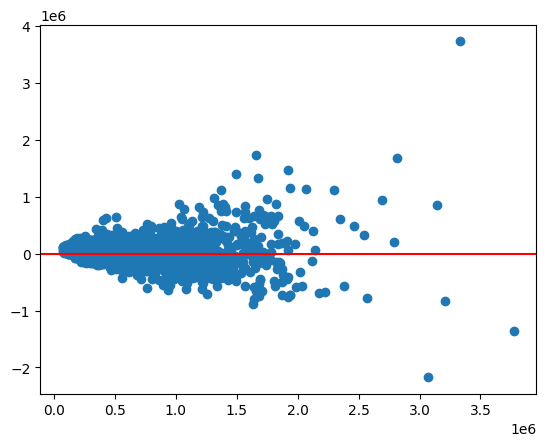

In [2525]:
residuals = y_test - linear_pred

plt.scatter(linear_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')

plt.show()

In [2526]:
ridge_alphas = [0.1, 1.0, 3.0, 5.0, 7.0, 9.0, 10.0] 

best_rmse = float('inf') 
best_alpha = None 

for alpha in ridge_alphas:
  
    ridge_regression = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', Ridge(alpha=alpha))
    ])

    ridge_regression.fit(X_train, y_train)

    ridge_pred = ridge_regression.predict(X_test)

    rmse = np.sqrt(mean_squared_error(ridge_pred, y_test))

    if rmse < best_rmse:
        best_rmse = rmse
        best_alpha = alpha

print("Best Alpha:", best_alpha)
print("Best RMSE:", best_rmse)

Best Alpha: 10.0
Best RMSE: 154493.231427937


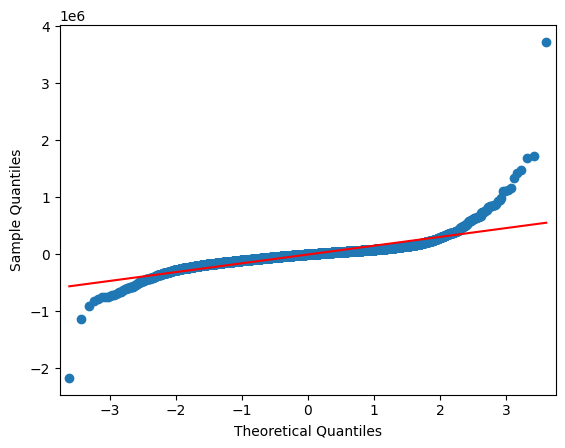

In [2527]:
residuals = y_test - ridge_pred
sm.qqplot(residuals, line='s')
plt.show()

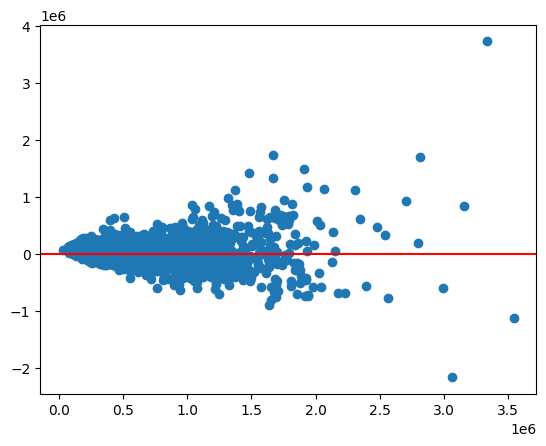

In [2528]:
residuals = y_test - ridge_pred

plt.scatter(ridge_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')

plt.show()

In [2529]:
#lasso_regression = Pipeline(steps=[
#    ('preprocessor', preprocessor),
#    ('regressor', Lasso(alpha=3.0, max_iter=2000, tol=0.001))
#])

#lasso_regression.fit(X_train, y_train)
#lasso_pred = lasso_regression.predict(X_test)
#print('Lasso Regression RMSE:', np.sqrt(mean_squared_error(lasso_pred, y_test)))


In [2530]:
#lasso_alphas = [0.1, 1.0, 3.0, 5.0, 7.0, 9.0, 10.0]
#best_rmse = float('inf') 
#best_alpha = None 
#for alpha in lasso_alphas:
  
#   lasso_regression = Pipeline(steps=[
#        ('preprocessor', preprocessor),
#        ('regressor', Lasso(alpha=alpha))
#    ])

#    lasso_regression.fit(X_train, y_train)
#    lasso_pred = lasso_regression.predict(X_test)
#    rmse = np.sqrt(mean_squared_error(lasso_pred, y_test))

#    if rmse < best_rmse:
#        best_rmse = rmse
#        best_alpha = alpha

#print("Best Alpha:", best_alpha)
#print("Best RMSE:", best_rmse)



In [2531]:
#residuals = y_test - lasso_pred
#sm.qqplot(residuals, line='s')
#plt.show()

In [2532]:
#residuals = y_test - lasso_pred
#plt.scatter(ridge_pred, residuals)
#plt.axhline(y=0, color='r', linestyle='-')
#plt.show()

In [2533]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))])

elasticnet_regression.fit(X_train, y_train)
elasticnet_pred = elasticnet_regression.predict(X_test)

print('Elastic Regression RMSE:', np.sqrt(mean_squared_error(elasticnet_pred, y_test)))

Elastic Regression RMSE: 172469.9532491079


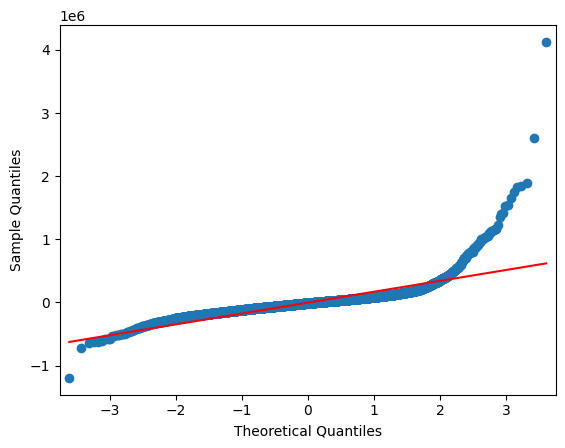

In [2534]:
residuals = y_test - elasticnet_pred
sm.qqplot(residuals, line='s')
plt.show()

In [2535]:
#residuals = y_test - lasso_pred
#plt.scatter(ridge_pred, residuals)
#plt.axhline(y=0, color='r', linestyle='-')
#plt.show()

All models perform worse at the extreme ends of the price values. Based on our previous graphs, we know there are many outliers in house prices, especially on the high end of the price range. I will look to remove some of these outliers to improve the models. I want to be sure I don't remove too many however, as I don't want to limit the price range that the models are working with too much. I will start by removing extreme outliers with z-scores of 3 and above.

In [2536]:
z_scores = stats.zscore(df['price'])
outliers_mask = np.abs(z_scores) > 4
outliers = df[outliers_mask]
print(outliers)


               id       date  sale_month  sale_year  sale_day      price   
17767  7352200450 2015-01-15           1       2015        15  2050000.0  \
14619  7936500109 2014-07-25           7       2014        25  2230000.0   
16614  7935000280 2014-08-12           8       2014        12  2195000.0   
246    2025069065 2014-09-29           9       2014        29  2400000.0   
300    3225069065 2014-06-24           6       2014        24  3075000.0   
...           ...        ...         ...        ...       ...        ...   
18793  2525049263 2014-07-09           7       2014         9  2680000.0   
19148  3625049042 2014-10-11          10       2014        11  3635000.0   
19236  2525049086 2014-10-03          10       2014         3  2720000.0   
20096  3262300485 2015-04-21           4       2015        21  2250000.0   
21040  6447300365 2014-11-13          11       2014        13  2900000.0   

       bedrooms  bathrooms  sqft_living  sqft_lot  ...  zipcode      lat   
17767      

In [2537]:
df = df[~outliers_mask]

<Axes: xlabel='price', ylabel='Count'>

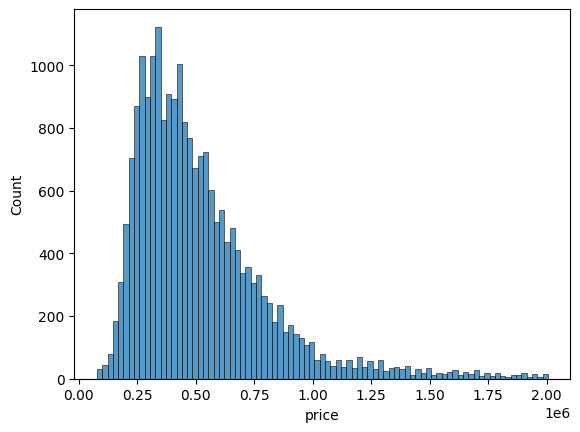

In [2538]:
sns.histplot(df['price'])

Since it's looking like the higher priced outlier homes are throwing off the model, and they represent a much smaller percentage of the dataset, I will look to remove the outliers on the higher end of the price range.

In [2539]:
df = df[df['price']< 1600000]

In [2540]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21158 entries, 0 to 18892
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  21158 non-null  int64         
 1   date                21158 non-null  datetime64[ns]
 2   sale_month          21158 non-null  int32         
 3   sale_year           21158 non-null  int32         
 4   sale_day            21158 non-null  int32         
 5   price               21158 non-null  float64       
 6   bedrooms            21158 non-null  int64         
 7   bathrooms           21158 non-null  float64       
 8   sqft_living         21158 non-null  int64         
 9   sqft_lot            21158 non-null  int64         
 10  floors              21158 non-null  float64       
 11  waterfront          21158 non-null  int64         
 12  view                21158 non-null  int64         
 13  condition           21158 non-null  int64         


<Axes: xlabel='price', ylabel='Count'>

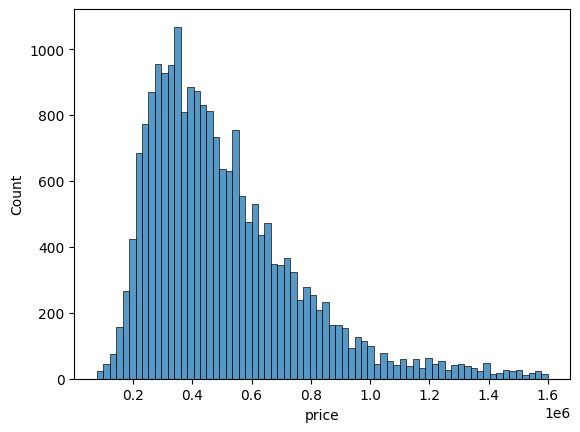

In [2541]:
sns.histplot(df['price'])

In [2542]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

linear_regression.fit(X_train, y_train)

linear_pred = linear_regression.predict(X_test)
print('Linear Regression RMSE:', np.sqrt(mean_squared_error(linear_pred, y_test)))

np.sqrt(mean_squared_error(linear_pred,y_test))

r2 = r2_score(y_test, linear_pred)
print("R-squared (R^2):", r2)


quantiles = [0.99, 0.95, 0.9, 0.5]

for quantile in quantiles:
    loss = quantile_loss(y_test, linear_pred, quantile)
    print(f"Quantile Loss ({quantile}): {loss}")

Linear Regression RMSE: 154832.40624763787
R-squared (R^2): 0.8056343078268019
Quantile Loss (0.99): 44987.87788612869
Quantile Loss (0.95): 45065.4162783521
Quantile Loss (0.9): 45162.3392686314
Quantile Loss (0.5): 45937.72319086561


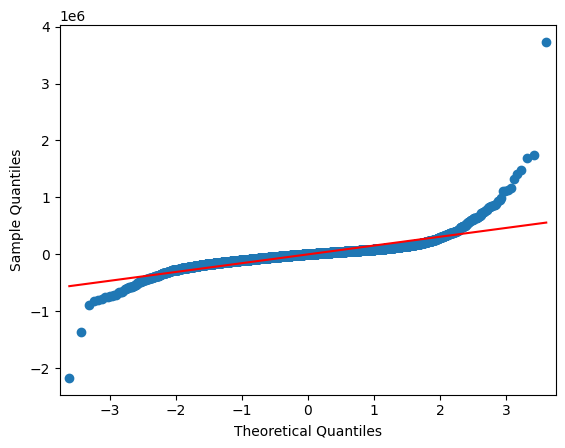

In [2543]:
residuals = y_test - linear_pred
sm.qqplot(residuals, line='s')
plt.show()

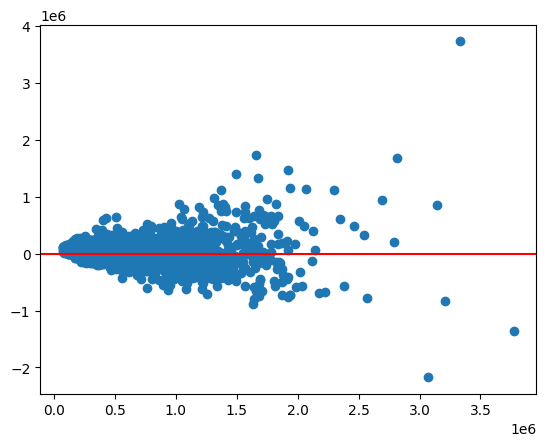

In [2544]:
residuals = y_test - linear_pred

plt.scatter(linear_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')

plt.show()

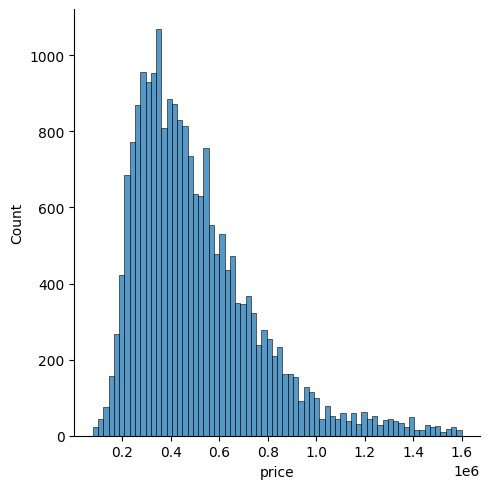

In [2545]:
sns.displot(df, x="price")

In [2546]:
df['sqft_living_squared'] = df['sqft_living'] ** 2


In [2547]:
num_bins = 5
bin_width = (df['bathrooms'].max() - df['bathrooms'].min()) / num_bins
bins = [df['bathrooms'].min() + i * bin_width for i in range(num_bins+1)]
df['bathrooms_bin'] = pd.cut(df['bathrooms'], bins=bins, labels=False, include_lowest=True)


In [2548]:
num_bins = 5
bin_width = (df['bedrooms'].max() - df['bedrooms'].min()) / num_bins
bins = [df['bedrooms'].min() + i * bin_width for i in range(num_bins+1)]
df['bedrooms_bin'] = pd.cut(df['bedrooms'], bins=bins, labels=False, include_lowest=True)

In [2549]:
num_bins = 5
bin_width = (df['sqft_living'].max() - df['sqft_living'].min()) / num_bins
bins = [df['sqft_living'].min() + i * bin_width for i in range(num_bins+1)]
df['sqft_living_bins'] = pd.cut(df['sqft_living'], bins=bins, labels=False, include_lowest=True)

In [2550]:
columns = df.columns.drop(['id', 'date'])

In [2551]:
correlations = [(column, df[column].corr(df['price'])) for column in columns]
correlations_sorted = sorted(correlations, key=lambda x: abs(x[1]), reverse=True)

for column, corr_coeff in correlations_sorted:
    print(f"Correlation between {column} and price: {corr_coeff:.2f}")

Correlation between price and price: 1.00
Correlation between grade_value and price: 0.71
Correlation between grade and price: 0.67
Correlation between sqft_living and price: 0.66
Correlation between sqft_living_squared and price: 0.65
Correlation between sqft_living15 and price: 0.59
Correlation between sqft_living_bins and price: 0.59
Correlation between zip_price_per_sqft and price: 0.59
Correlation between sqft_above and price: 0.56
Correlation between price_per_sqft and price: 0.50
Correlation between bathrooms and price: 0.49
Correlation between bathrooms_bin and price: 0.43
Correlation between lat and price: 0.39
Correlation between sqft_per_floor and price: 0.38
Correlation between bedrooms and price: 0.32
Correlation between view and price: 0.31
Correlation between floors and price: 0.28
Correlation between sqft_basement and price: 0.28
Correlation between bedrooms_bin and price: 0.24
Correlation between yr_renovated and price: 0.11
Correlation between renovated and price: 0.1

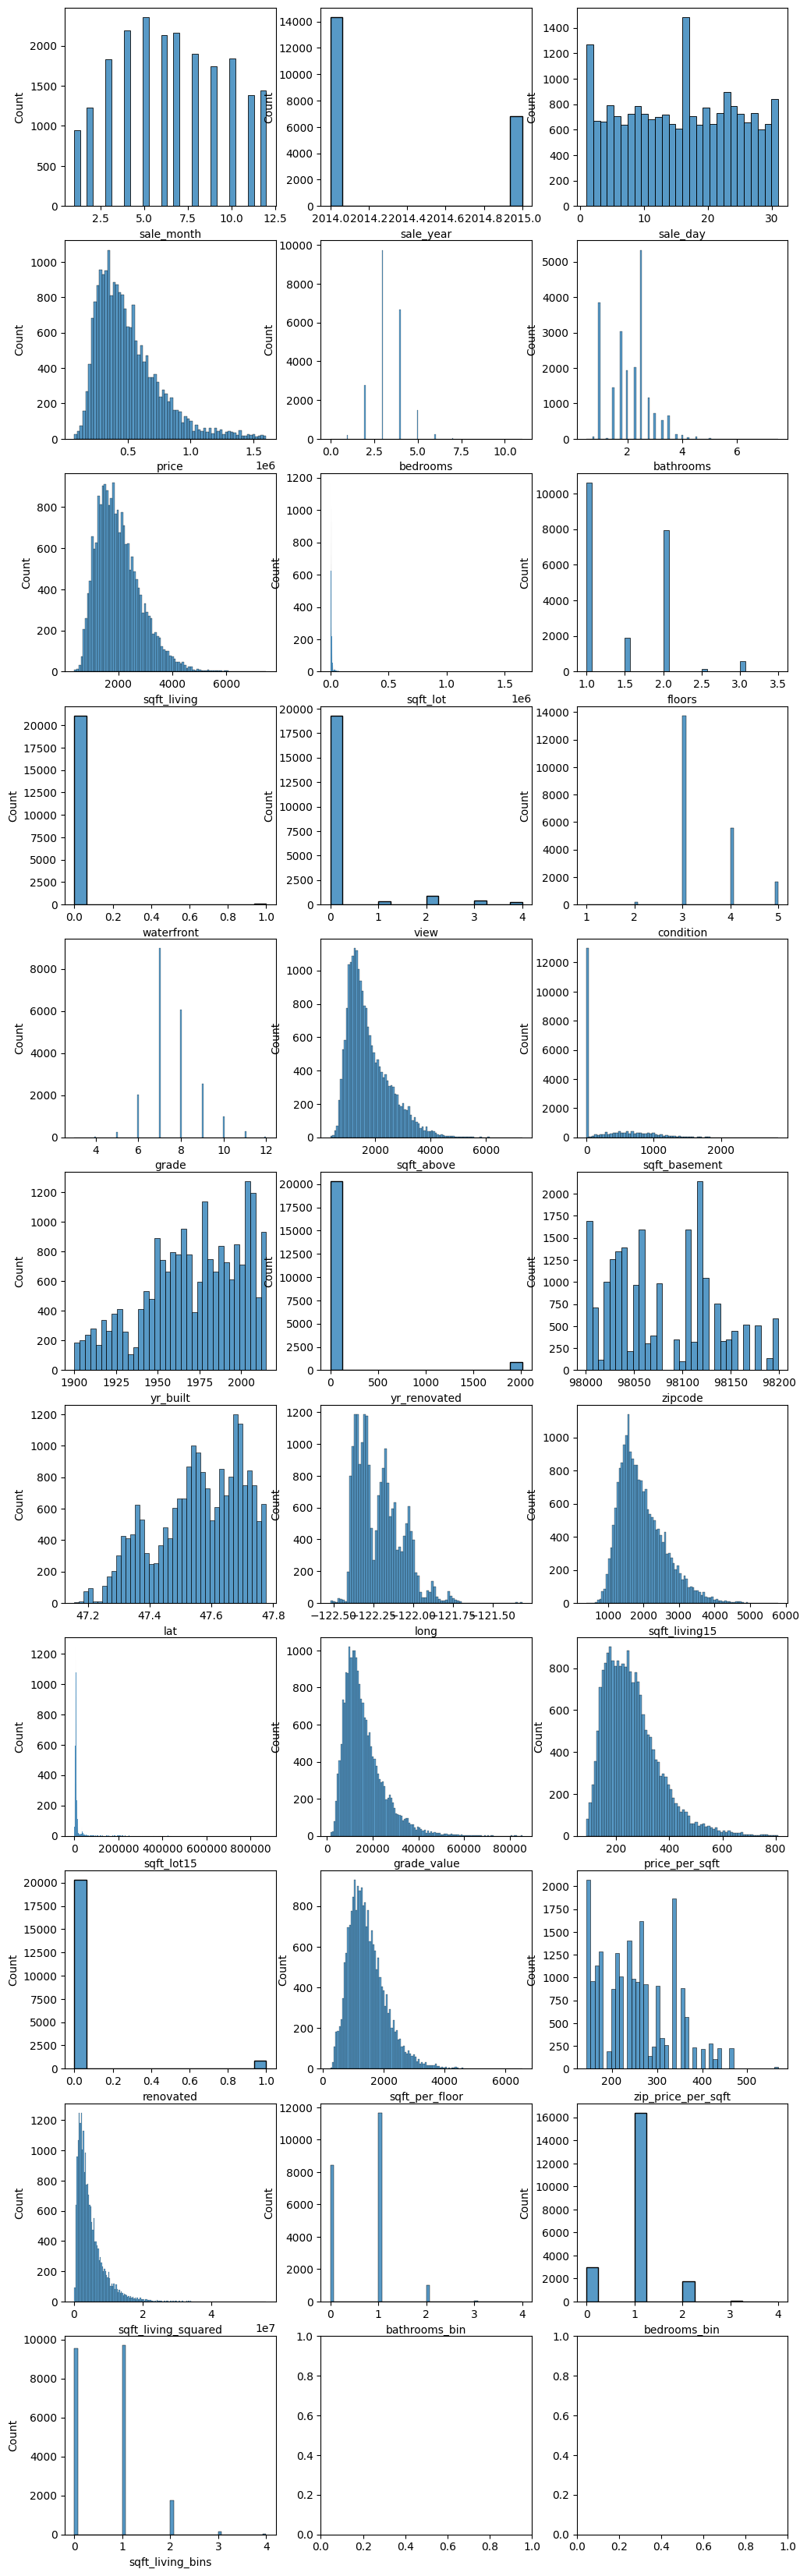

In [2552]:
# Set the number of rows and columns for the subplots grid
num_plots = len(columns)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

# Set the size of the figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows))
fig.tight_layout()

# Iterate over the columns and create the density plots
for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.histplot(data=df, x=column, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

plt.show()

Many of the key variables are right skewed. I can look to add log_variable equivalents of these variables to see if it helps my model.

In [2553]:
df['log_sqft_living'] = np.log(df['sqft_living'])
df['log_sqft_above'] = np.log(df['sqft_above'])
df['log_sqft_living15'] = np.log(df['sqft_living15'])
df['log_grade_value'] = np.log(df['grade_value'])
df['log_sqft_per_floor'] = np.log(df['sqft_per_floor'])

In [2554]:
columns = df.columns.drop(['id', 'date'])

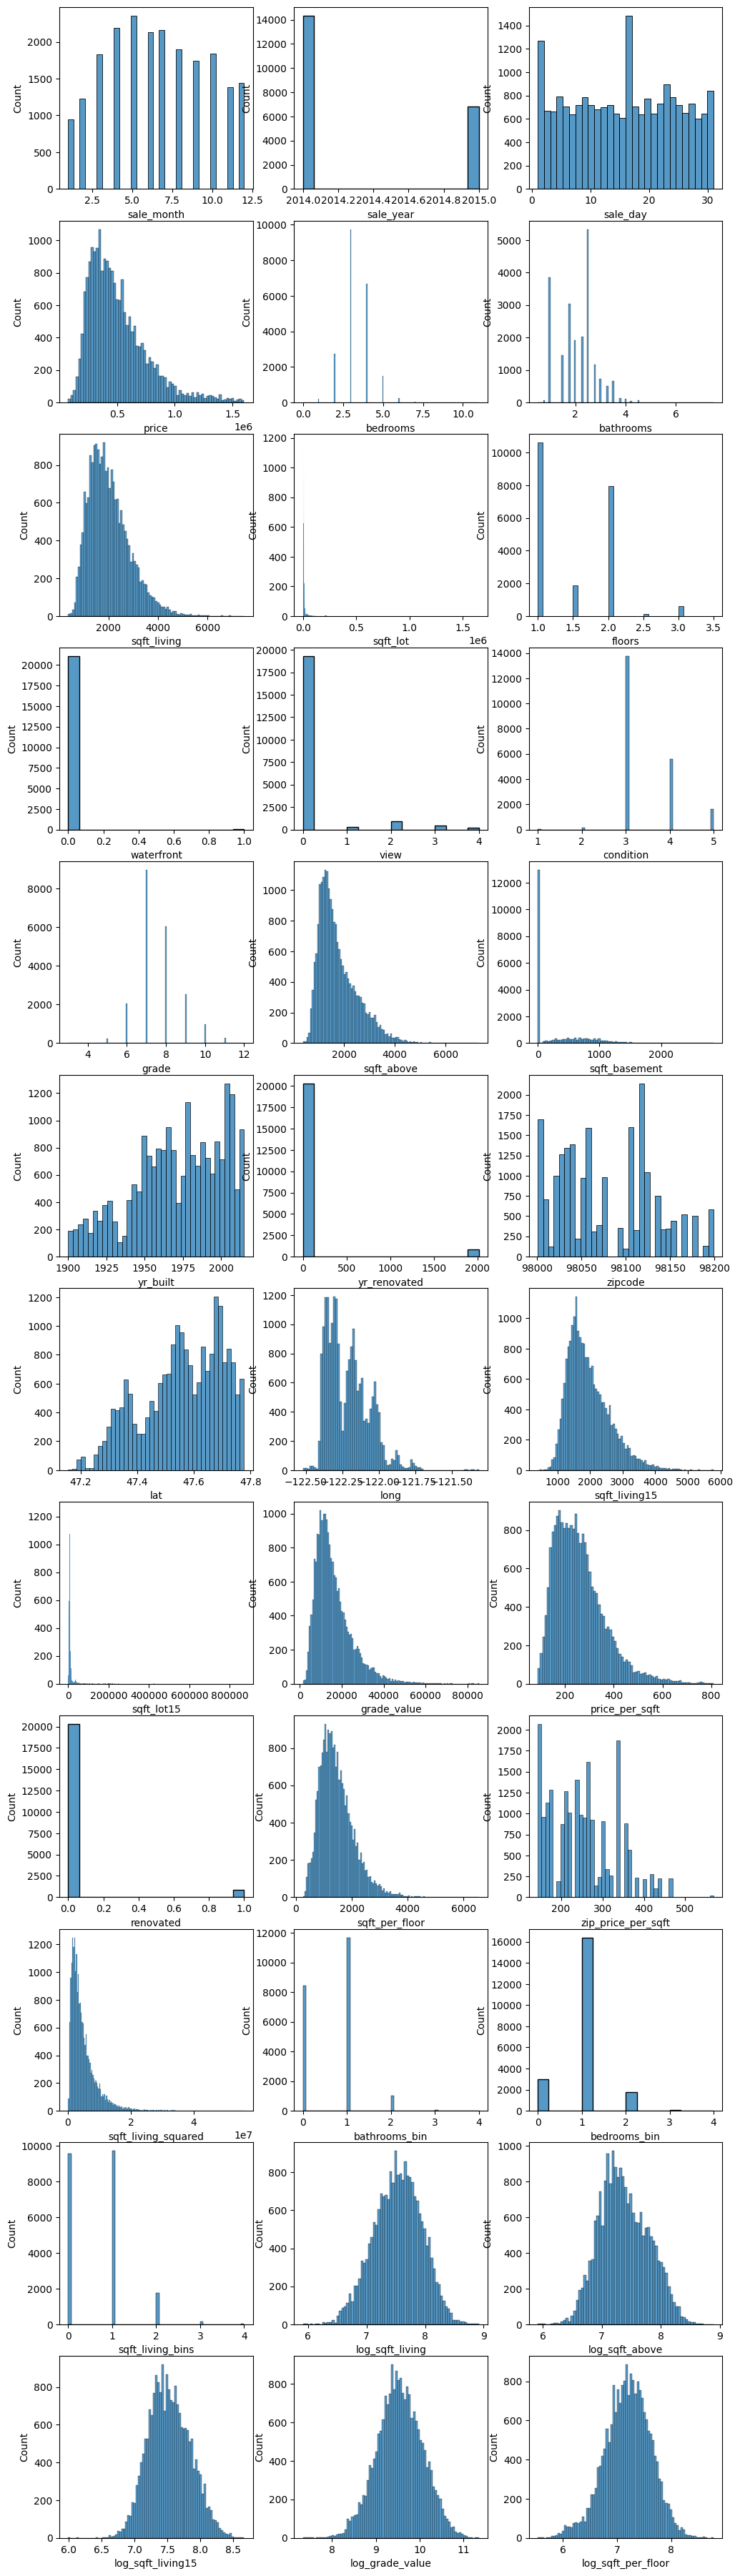

In [2555]:
# Set the number of rows and columns for the subplots grid
num_plots = len(columns)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

# Set the size of the figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows))
fig.tight_layout()

# Iterate over the columns and create the density plots
for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.histplot(data=df, x=column, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

plt.show()

In [2556]:
correlations = [(column, df[column].corr(df['price'])) for column in columns]
correlations_sorted = sorted(correlations, key=lambda x: abs(x[1]), reverse=True)

for column, corr_coeff in correlations_sorted:
    print(f"Correlation between {column} and price: {corr_coeff:.2f}")

Correlation between price and price: 1.00
Correlation between grade_value and price: 0.71
Correlation between grade and price: 0.67
Correlation between log_grade_value and price: 0.67
Correlation between sqft_living and price: 0.66
Correlation between sqft_living_squared and price: 0.65
Correlation between log_sqft_living and price: 0.62
Correlation between sqft_living15 and price: 0.59
Correlation between sqft_living_bins and price: 0.59
Correlation between zip_price_per_sqft and price: 0.59
Correlation between log_sqft_living15 and price: 0.57
Correlation between sqft_above and price: 0.56
Correlation between log_sqft_above and price: 0.54
Correlation between price_per_sqft and price: 0.50
Correlation between bathrooms and price: 0.49
Correlation between bathrooms_bin and price: 0.43
Correlation between lat and price: 0.39
Correlation between sqft_per_floor and price: 0.38
Correlation between log_sqft_per_floor and price: 0.36
Correlation between bedrooms and price: 0.32
Correlation 

In [2557]:
results = ols("price ~ grade_value + grade + log_grade_value + sqft_living + sqft_living_squared + log_sqft_living + sqft_living_bins +  sqft_living15 + log_sqft_living15 + sqft_above + log_sqft_above + zip_price_per_sqft + bathrooms + bathrooms_bin + sqft_per_floor + log_sqft_per_floor + lat + view + sqft_basement + bedrooms", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     5458.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        04:42:37   Log-Likelihood:            -2.7465e+05
No. Observations:               21158   AIC:                         5.493e+05
Df Residuals:                   21138   BIC:                         5.495e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.929e+06   3

In [2558]:
df['sqft_basement']

0           0
117         0
126       480
273         0
281         0
         ... 
14803    1470
16377       0
17209       0
17930     480
18892       0
Name: sqft_basement, Length: 21158, dtype: int64

In [2559]:
categorical_features = ['grade', 'view', 'bathrooms_bin']
numerical_features = ['grade_value', 'log_grade_value', 'sqft_living', 'sqft_living_squared', 'log_sqft_living','sqft_living_bins','sqft_above', 'log_sqft_above', 'sqft_living15', 'log_sqft_living15','zip_price_per_sqft', 'bathrooms', 'bathrooms_bin','sqft_per_floor', 'log_sqft_per_floor','lat','sqft_basement', 'bedrooms']
target = 'price'

In [2560]:
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features],df[target], test_size = 0.3, random_state=1234)

In [2561]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

linear_regression.fit(X_train, y_train)

linear_pred = linear_regression.predict(X_test)
print('Linear Regression RMSE:', np.sqrt(mean_squared_error(linear_pred, y_test)))

np.sqrt(mean_squared_error(linear_pred,y_test))

r2 = r2_score(y_test, linear_pred)
print("R-squared (R^2):", r2)


quantiles = [0.99, 0.95, 0.9, 0.5]

for quantile in quantiles:
    loss = quantile_loss(y_test, linear_pred, quantile)
    print(f"Quantile Loss ({quantile}): {loss}")

Linear Regression RMSE: 11184360375144.531
R-squared (R^2): -1892597338015910.2
Quantile Loss (0.99): 138972224370.81747
Quantile Loss (0.95): 133357186523.61462
Quantile Loss (0.9): 126338389214.6111
Quantile Loss (0.5): 70188010742.5831


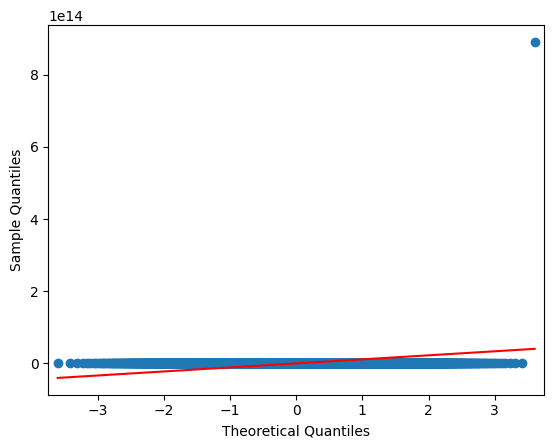

In [2562]:
residuals = y_test - linear_pred
sm.qqplot(residuals, line='s')
plt.show()

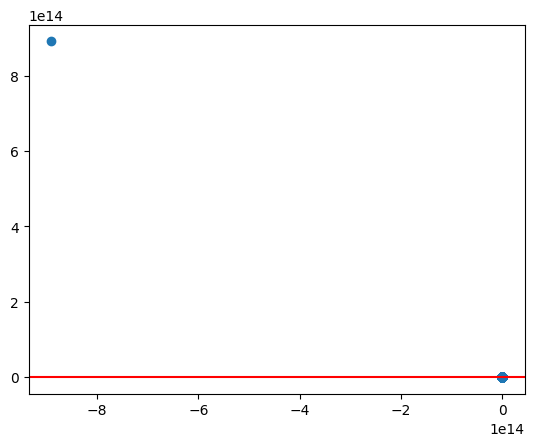

In [2563]:
residuals = y_test - linear_pred

plt.scatter(linear_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')

plt.show()

In [2564]:
ridge_alphas = [0.1, 1.0, 3.0, 5.0, 7.0, 9.0, 10.0] 

best_rmse = float('inf') 
best_alpha = None 

for alpha in ridge_alphas:
  
    ridge_regression = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', Ridge(alpha=alpha))
    ])

    ridge_regression.fit(X_train, y_train)

    ridge_pred = ridge_regression.predict(X_test)

    rmse = np.sqrt(mean_squared_error(ridge_pred, y_test))

    if rmse < best_rmse:
        best_rmse = rmse
        best_alpha = alpha

print("Best Alpha:", best_alpha)
print("Best RMSE:", best_rmse)

r2 = r2_score(y_test, ridge_pred)
print("R-squared (R^2):", r2)


quantiles = [0.99, 0.95, 0.9, 0.5]

for quantile in quantiles:
    loss = quantile_loss(y_test, ridge_pred, quantile)
    print(f"Quantile Loss ({quantile}): {loss}")

Best Alpha: 0.1
Best RMSE: 109176.09104298447
R-squared (R^2): 0.8192216163258126
Quantile Loss (0.99): 38805.076512523585
Quantile Loss (0.95): 38758.50572140804
Quantile Loss (0.9): 38700.29223251362
Quantile Loss (0.5): 38234.584321358205


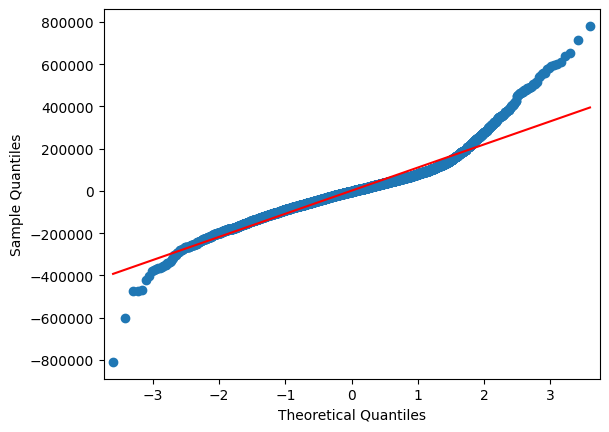

In [2565]:
residuals = y_test - ridge_pred
sm.qqplot(residuals, line='s')
plt.show()

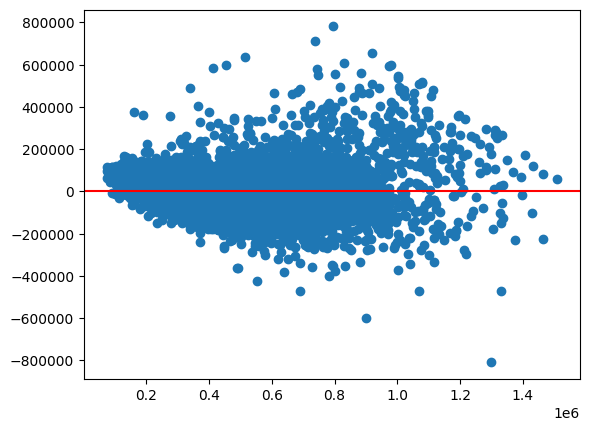

In [2566]:
residuals = y_test - ridge_pred

plt.scatter(ridge_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')

plt.show()

In [2567]:
lasso_regression = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=3.0, max_iter=2000, tol=0.001))
])

lasso_regression.fit(X_train, y_train)
lasso_pred = lasso_regression.predict(X_test)
print('Lasso Regression RMSE:', np.sqrt(mean_squared_error(lasso_pred, y_test)))

r2 = r2_score(y_test, lasso_pred)
print("R-squared (R^2):", r2)


quantiles = [0.99, 0.95, 0.9, 0.5]

for quantile in quantiles:
    loss = quantile_loss(y_test, lasso_pred, quantile)
    print(f"Quantile Loss ({quantile}): {loss}")

Lasso Regression RMSE: 109184.5566601375
R-squared (R^2): 0.8196324730829055
Quantile Loss (0.99): 38772.96748601434
Quantile Loss (0.95): 38726.7797190184
Quantile Loss (0.9): 38669.04501027346
Quantile Loss (0.5): 38207.16734031397


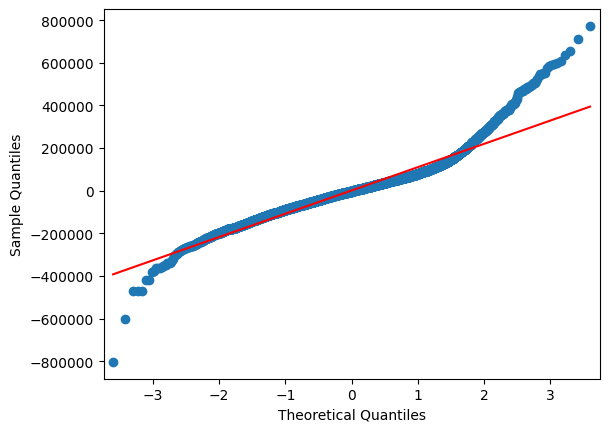

In [2568]:
residuals = y_test - lasso_pred
sm.qqplot(residuals, line='s')
plt.show()

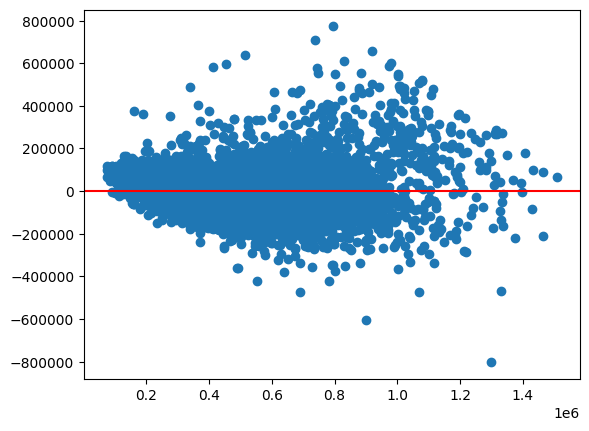

In [2569]:
residuals = y_test - lasso_pred

plt.scatter(ridge_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')

plt.show()

In [2570]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))])

elasticnet_regression.fit(X_train, y_train)
elasticnet_pred = elasticnet_regression.predict(X_test)

print('Elastic Regression RMSE:', np.sqrt(mean_squared_error(elasticnet_pred, y_test)))

Elastic Regression RMSE: 118002.08380889124


In [2571]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))])

elasticnet_regression.fit(X_train, y_train)
elasticnet_pred = elasticnet_regression.predict(X_test)

print('Elastic Regression RMSE:', np.sqrt(mean_squared_error(elasticnet_pred, y_test)))

r2 = r2_score(y_test, elasticnet_pred)
print("R-squared (R^2):", r2)


quantiles = [0.99, 0.95, 0.9, 0.5]

for quantile in quantiles:
    loss = quantile_loss(y_test, elasticnet_pred, quantile)
    print(f"Quantile Loss ({quantile}): {loss}")



Elastic Regression RMSE: 118002.08380889124
R-squared (R^2): 0.789323898248704
Quantile Loss (0.99): 40864.595627330775
Quantile Loss (0.95): 40810.67492866774
Quantile Loss (0.9): 40743.27405533894
Quantile Loss (0.5): 40204.06706870859


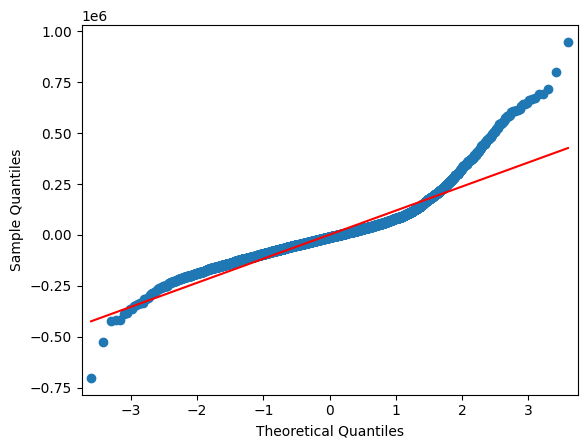

In [2572]:
residuals = y_test - elasticnet_pred
sm.qqplot(residuals, line='s')
plt.show()

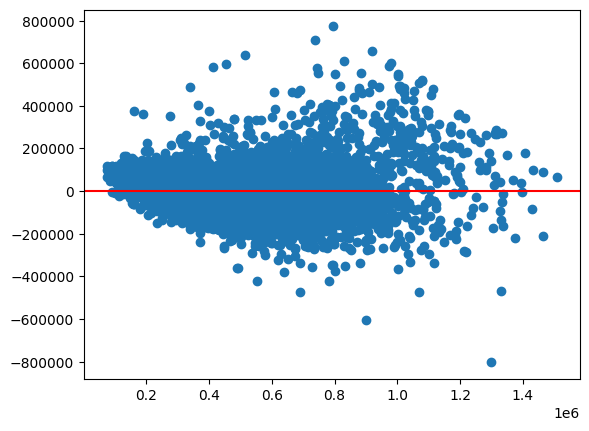

In [2573]:
residuals = y_test - lasso_pred

plt.scatter(ridge_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')

plt.show()

<Axes: xlabel='price', ylabel='Count'>

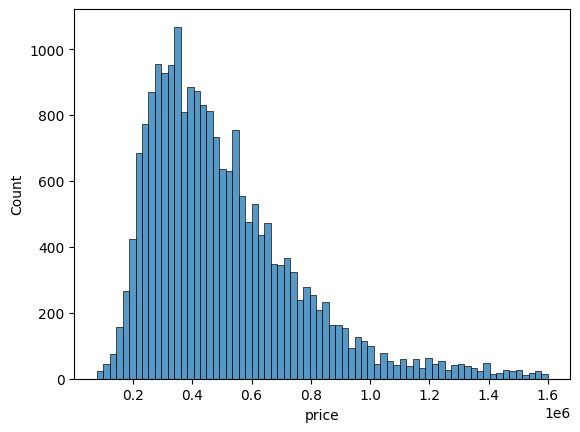

In [2574]:
sns.histplot(data=df, x= 'price')

In [2575]:
df[df['price']>1750000]

,id,date,sale_month,sale_year,sale_day,price,bedrooms,bathrooms,sqft_living,sqft_lot,...,zip_price_per_sqft,sqft_living_squared,bathrooms_bin,bedrooms_bin,sqft_living_bins,log_sqft_living,log_sqft_above,log_sqft_living15,log_grade_value,log_sqft_per_floor


We can see that 

In [2576]:
df['log_price'] = np.log(df['price'])

In [2584]:
numerical_features = ['grade_value', 'log_grade_value', 'sqft_living', 'sqft_living_squared', 'log_sqft_living',
                      'sqft_living_bins', 'sqft_above', 'log_sqft_above', 'sqft_living15', 'log_sqft_living15',
                      'zip_price_per_sqft', 'bathrooms', 'bathrooms_bin', 'sqft_per_floor', 'log_sqft_per_floor',
                      'lat', 'bedrooms']



In [2578]:
correlations = [(column, df[column].corr(df['log_price'])) for column in columns]
correlations_sorted = sorted(correlations, key=lambda x: abs(x[1]), reverse=True)

for column, corr_coeff in correlations_sorted:
    print(f"Correlation between {column} and log_price: {corr_coeff:.2f}")

Correlation between price and log_price: 0.95
Correlation between log_grade_value and log_price: 0.68
Correlation between grade_value and log_price: 0.67
Correlation between grade and log_price: 0.66
Correlation between sqft_living and log_price: 0.65
Correlation between log_sqft_living and log_price: 0.64
Correlation between zip_price_per_sqft and log_price: 0.62
Correlation between sqft_living_squared and log_price: 0.60
Correlation between sqft_living15 and log_price: 0.58
Correlation between log_sqft_living15 and log_price: 0.58
Correlation between sqft_living_bins and log_price: 0.58
Correlation between sqft_above and log_price: 0.55
Correlation between log_sqft_above and log_price: 0.55
Correlation between price_per_sqft and log_price: 0.52
Correlation between bathrooms and log_price: 0.50
Correlation between lat and log_price: 0.47
Correlation between bathrooms_bin and log_price: 0.43
Correlation between sqft_per_floor and log_price: 0.37
Correlation between log_sqft_per_floor a

In [2579]:
categorical_features = ['grade', 'view', 'sqft_living_bins', 'bathrooms_bin']
numerical_features = ['log_grade_value', 'grade_value', 'sqft_living', 'log_sqft_living', 'zip_price_per_sqft', 'sqft_living_squared', 'sqft_living15', 'log_sqft_living15', 'sqft_above', 'log_sqft_above', 'bathrooms', 'sqft_per_floor', 'log_sqft_per_floor', 'bedrooms', 'floors' ]
target = 'log_price'

In [2580]:
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features],np.exp(df[target]), test_size = 0.3, random_state=1234)